<a href="https://colab.research.google.com/github/Rohianon/LoanPrediction/blob/main/LOAN_PROJECTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan project with the listed objectives 
0. To predict the credit worthnes of applicants

1. To understand the relationship between the member's Income and the loan Purpose

2. Education level and the Applicant income ()

3. Gender and credit history

4. Married and purpose

5. Dependents and loanamount

6. Loan amount and purpose

7. Education and loan status

8. 


In [ ]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# !pip install tqdm
from tqdm import tqdm
from google.colab import files
import missingno

In [ ]:
uploaded = files.upload()

Saving Loanapplicationsampl.csv to Loanapplicationsampl.csv


In [ ]:
#Loading my data

LoanData=pd.read_csv("Loanapplicationsampl.csv")
LoanData.head()

,Member_ID,systemloanid,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalSavings,loanamount,totaldue,ReferredBy,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,301994762,Male,No,0,Graduate,No,5849,0,26860,10000,13000,LP001003,360.0,Good,Urban,Y
1,LP001003,301965204,Male,Yes,1,Graduate,No,4583,1508,10822,10000,13000,LP001004,360.0,Good,Rural,N
2,LP001005,301966580,Male,Yes,0,Graduate,Yes,3000,0,26143,20000,23800,LP001005,360.0,Good,Urban,Y
3,LP001006,301999343,Male,Yes,0,Not Graduate,No,2583,2358,11377,10000,11500,LP001006,360.0,Good,Urban,Y
4,LP001008,301962360,Male,No,0,Graduate,No,6000,0,12343,10000,11500,LP001007,360.0,Bad,Urban,Y


In [ ]:
LoanData.head()

,Member_ID,systemloanid,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalSavings,loanamount,totaldue,ReferredBy,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,301994762,Male,No,0,Graduate,No,5849,0,26860,10000,13000,LP001003,360.0,Good,Urban,Y
1,LP001003,301965204,Male,Yes,1,Graduate,No,4583,1508,10822,10000,13000,LP001004,360.0,Good,Rural,N
2,LP001005,301966580,Male,Yes,0,Graduate,Yes,3000,0,26143,20000,23800,LP001005,360.0,Good,Urban,Y
3,LP001006,301999343,Male,Yes,0,Not Graduate,No,2583,2358,11377,10000,11500,LP001006,360.0,Good,Urban,Y
4,LP001008,301962360,Male,No,0,Graduate,No,6000,0,12343,10000,11500,LP001007,360.0,Bad,Urban,Y


## Data Understanding 

In [ ]:
#How many columsn do I have
LoanData.columns

Index(['Member_ID', 'systemloanid', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'TotalSavings', 'loanamount', 'totaldue', 'ReferredBy',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Do I have some unique
LoanData.nunique()

Member_ID            99
systemloanid         99
Gender                2
Married               2
Dependents            5
Education             2
Self_Employed         2
ApplicantIncome      87
CoapplicantIncome    60
TotalSavings         98
loanamount            4
totaldue             13
ReferredBy           99
Loan_Amount_Term      7
Credit_History        2
Property_Area         3
Loan_Status           2
dtype: int64

In [ ]:
#Do I have some duplicates?
LoanData.duplicated().any()

False

In [ ]:
LoanData.shape

(99, 17)

In [ ]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Member_ID          99 non-null     object 
 1   systemloanid       99 non-null     int64  
 2   Gender             98 non-null     object 
 3   Married            99 non-null     object 
 4   Dependents         99 non-null     object 
 5   Education          99 non-null     object 
 6   Self_Employed      93 non-null     object 
 7   ApplicantIncome    99 non-null     int64  
 8   CoapplicantIncome  99 non-null     int64  
 9   TotalSavings       99 non-null     int64  
 10  loanamount         99 non-null     int64  
 11  totaldue           99 non-null     int64  
 12  ReferredBy         99 non-null     object 
 13  Loan_Amount_Term   94 non-null     float64
 14  Credit_History     99 non-null     object 
 15  Property_Area      99 non-null     object 
 16  Loan_Status        99 non-nu

## Standardizing the Column Names for easy usage


In [ ]:
#Standardizing our columns
LoanData.columns=LoanData.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
# Checking the Missing Values in the remaining columns in the dataset and the percentage to fill
missing_data =LoanData.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Column Name', 'Missing Values Count']
missing_data['Filling Factor (%)']=(LoanData.shape[0]-missing_data['Missing Values Count'])/LoanData.shape[0]*100
missing_data.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,self_employed,6,93.939394
1,loan_amount_term,5,94.949495
2,gender,1,98.989899
3,member_id,0,100.000000
4,credit_history,0,100.000000
5,referredby,0,100.000000
6,totaldue,0,100.000000
7,loanamount,0,100.000000
8,totalsavings,0,100.000000
9,coapplicantincome,0,100.000000


In [ ]:
mask = LoanData.isnull().any(axis=1)
LoanData[mask]



,member_id,systemloanid,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,totalsavings,loanamount,totaldue,referredby,loan_amount_term,credit_history,property_area,loan_status
11,LP001027,301960371,Male,Yes,2,Graduate,NaN,2500,1840,18715,10000,11500,LP001014,360.0,Bad,Urban,Y
19,LP001041,301959458,Male,Yes,0,Graduate,NaN,2600,3500,21511,10000,13000,LP001022,NaN,Good,Urban,Y
23,LP001050,301973446,NaN,Yes,2,Not Graduate,No,3365,1917,19136,20000,21900,LP001026,360.0,Good,Rural,N
24,LP001052,301999087,Male,Yes,1,Graduate,NaN,3717,2925,12521,30000,34400,LP001027,360.0,Good,Semiurban,N
29,LP001087,301972649,Female,No,2,Graduate,NaN,3750,2083,19203,10000,11500,LP001032,360.0,Bad,Semiurban,Y
30,LP001091,301966278,Male,Yes,1,Graduate,NaN,4166,3369,13700,20000,24500,LP001033,360.0,Good,Urban,N
36,LP001109,301959225,Male,Yes,0,Graduate,No,1828,1330,21943,10000,13000,LP001039,NaN,Good,Urban,N
44,LP001136,301983676,Male,Yes,0,Not Graduate,Yes,4695,0,25193,10000,11500,LP001047,NaN,Good,Urban,Y
45,LP001137,301974590,Female,No,0,Graduate,No,3410,0,22912,10000,13000,LP001048,NaN,Good,Urban,Y
73,LP001250,301993647,Male,Yes,3+,Not Graduate,No,4755,0,11644,40000,44000,LP001076,NaN,Good,Semiurban,N


In [ ]:
# LoanData[.isnull()==True]
null_data = LoanData[LoanData.isnull().all(axis=1)]
null_data

,member_id,systemloanid,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,totalsavings,loanamount,totaldue,referredby,loan_amount_term,credit_history,property_area,loan_status


In [ ]:
null_data = LoanData[LoanData.isnull().any(axis=1)]
null_data

,member_id,systemloanid,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,totalsavings,loanamount,totaldue,referredby,loan_amount_term,credit_history,property_area,loan_status
11,LP001027,301960371,Male,Yes,2,Graduate,NaN,2500,1840,18715,10000,11500,LP001014,360.0,Bad,Urban,Y
19,LP001041,301959458,Male,Yes,0,Graduate,NaN,2600,3500,21511,10000,13000,LP001022,NaN,Good,Urban,Y
23,LP001050,301973446,NaN,Yes,2,Not Graduate,No,3365,1917,19136,20000,21900,LP001026,360.0,Good,Rural,N
24,LP001052,301999087,Male,Yes,1,Graduate,NaN,3717,2925,12521,30000,34400,LP001027,360.0,Good,Semiurban,N
29,LP001087,301972649,Female,No,2,Graduate,NaN,3750,2083,19203,10000,11500,LP001032,360.0,Bad,Semiurban,Y
30,LP001091,301966278,Male,Yes,1,Graduate,NaN,4166,3369,13700,20000,24500,LP001033,360.0,Good,Urban,N
36,LP001109,301959225,Male,Yes,0,Graduate,No,1828,1330,21943,10000,13000,LP001039,NaN,Good,Urban,N
44,LP001136,301983676,Male,Yes,0,Not Graduate,Yes,4695,0,25193,10000,11500,LP001047,NaN,Good,Urban,Y
45,LP001137,301974590,Female,No,0,Graduate,No,3410,0,22912,10000,13000,LP001048,NaN,Good,Urban,Y
73,LP001250,301993647,Male,Yes,3+,Not Graduate,No,4755,0,11644,40000,44000,LP001076,NaN,Good,Semiurban,N


There is no complete row with Null Values. The null values have been entered randomly.


In [ ]:

#check for NaNs and print them. 
nulls = []
def nan_checker(LoanData, column,threshold = len(LoanData)/110):
    #formated string
    Bold = '\033[1m'
    End = '\033[0m'
    null_counter = LoanData[column].isnull().sum()
    if LoanData[column].isnull().values.any():
        print(f'For {column} \n You need to handle  { Bold} {null_counter} {End} Missing values now')
        return nulls.append(column)
    return ''

for col in LoanData.columns:
    nan_checker(LoanData, col)

For gender 
 You need to handle   1  Missing values now
For self_employed 
 You need to handle   6  Missing values now
For loan_amount_term 
 You need to handle   5  Missing values now


In [ ]:
pd.set_option("display.max_rows", 500, "display.max_columns", None)
LoanData

,member_id,systemloanid,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,totalsavings,loanamount,totaldue,referredby,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,301994762,Male,No,0,Graduate,No,5849,0,26860,10000,13000,LP001003,360.0,Good,Urban,Y
1,LP001003,301965204,Male,Yes,1,Graduate,No,4583,1508,10822,10000,13000,LP001004,360.0,Good,Rural,N
2,LP001005,301966580,Male,Yes,0,Graduate,Yes,3000,0,26143,20000,23800,LP001005,360.0,Good,Urban,Y
3,LP001006,301999343,Male,Yes,0,Not Graduate,No,2583,2358,11377,10000,11500,LP001006,360.0,Good,Urban,Y
4,LP001008,301962360,Male,No,0,Graduate,No,6000,0,12343,10000,11500,LP001007,360.0,Bad,Urban,Y
5,LP001011,301986516,Male,Yes,2,Graduate,Yes,5417,4196,25471,20000,23800,LP001008,360.0,Bad,Urban,Y
6,LP001013,301972027,Male,Yes,0,Not Graduate,No,2333,1516,26120,30000,39000,LP001009,360.0,Good,Urban,Y
7,LP001014,301994428,Male,Yes,3,Graduate,No,3036,2504,17478,20000,24500,LP001010,360.0,Good,Semiurban,N
8,LP001018,301996687,Male,Yes,2,Graduate,No,4006,1526,17173,10000,13000,LP001011,360.0,Good,Urban,Y
9,LP001020,301981931,Male,Yes,1,Graduate,No,12841,10968,11622,10000,11500,LP001012,360.0,Good,Semiurban,N


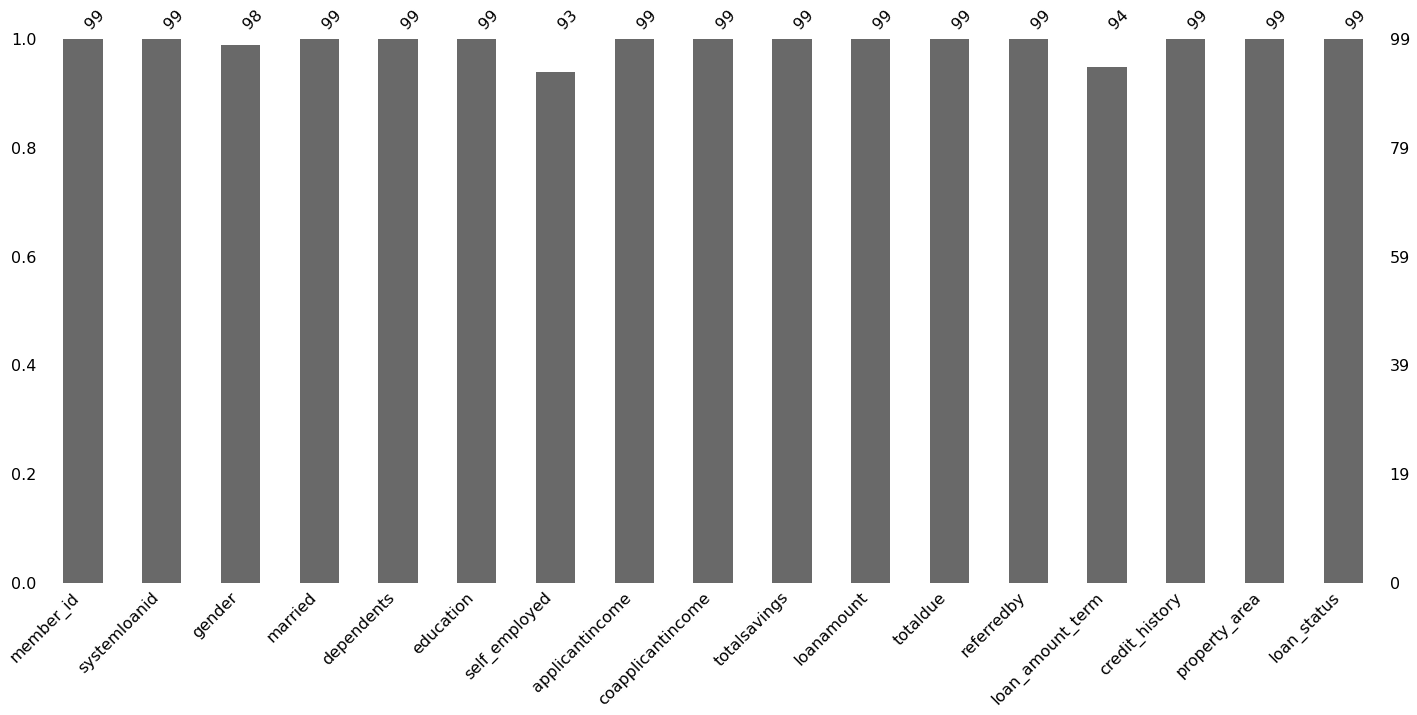

In [ ]:
missingno.bar(LoanData)

## Data cleaning 

In [ ]:
LoanData.columns

Index(['member_id', 'systemloanid', 'gender', 'married', 'dependents',
       'education', 'self_employed', 'applicantincome', 'coapplicantincome',
       'totalsavings', 'loanamount', 'totaldue', 'referredby',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [ ]:
#Drop duplicated variables
LoanData.drop_duplicates().any()

member_id            True
systemloanid         True
gender               True
married              True
dependents           True
education            True
self_employed        True
applicantincome      True
coapplicantincome    True
totalsavings         True
loanamount           True
totaldue             True
referredby           True
loan_amount_term     True
credit_history       True
property_area        True
loan_status          True
dtype: bool

### Dealing with quantitative variables with missing data

In [ ]:
#Ascertain the columns with missin values
for col in LoanData.columns:
    nan_checker(LoanData, col)

For gender 
 You need to handle   1  Missing values now
For self_employed 
 You need to handle   6  Missing values now
For loan_amount_term 
 You need to handle   5  Missing values now


In [ ]:
LoanData.columns

Index(['member_id', 'systemloanid', 'gender', 'married', 'dependents',
       'education', 'self_employed', 'applicantincome', 'coapplicantincome',
       'totalsavings', 'loanamount', 'totaldue', 'referredby',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [ ]:
#This not filling the the nulls correct it
#For quantitative data
from sklearn.impute import SimpleImputer
numerical_cols = LoanData[["loan_amount_term"]]
categorical_cols = LoanData[['gender','self_employed']]
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)

In [ ]:
CleanData = LoanData.copy()
CleanData['loan_amount_term'] = lat
CleanData[['gender','self_employed']] = g_se

CleanData.isnull().sum()


member_id            0
systemloanid         0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
totalsavings         0
loanamount           0
totaldue             0
referredby           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### Dealing with Outliers

In [ ]:
outliers = []
def outlier_checker(LoanData, column='ApplicantIncome',threshold = len(LoanData)/110):
    #formated string
    Bold = '\033[1m'
    End = '\033[0m'
    outlier_counter = LoanData[LoanData[column]>LoanData[column].mean() + 3*LoanData[column].std()]
    if len(outlier_counter)>0:
        print(f'For {column} \n You need to handle  { Bold} {len(outlier_counter)} {End} Oultier values now')
        print(f'Your column has outliers at position:')
        print(list(outlier_counter.index))
        return outliers.append(outlier_counter)
    return 'No Outlieres'
    


outlier_checker(LoanData)

KeyError: ignored

In [ ]:
for col in LoanData.columns:
    if (LoanData[col].dtype == 'int') | (LoanData[col].dtype == 'float'):
        outlier_checker(LoanData, col)

For applicantincome 
 You need to handle   3  Oultier values now
Your column has outliers at position:
[9, 34, 54]
For coapplicantincome 
 You need to handle   2  Oultier values now
Your column has outliers at position:
[9, 12]


In [ ]:
column = 'ApplicantIncome'
outlier_counter = LoanData[LoanData[column]>LoanData[column].mean() + 3*LoanData[column].std()]
outlier_counter

KeyError: ignored

In [ ]:
LoanData.dtypes

member_id             object
systemloanid           int64
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome      int64
totalsavings           int64
loanamount             int64
totaldue               int64
referredby            object
loan_amount_term     float64
credit_history        object
property_area         object
loan_status           object
dtype: object

### Data Analysis 

### Univariate Analysis.

  0%|          | 0/15 [00:00<?, ?it/s]

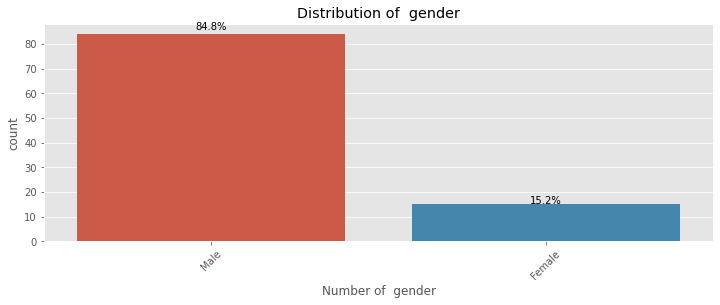

 13%|█▎        | 2/15 [00:00<00:01, 11.95it/s]

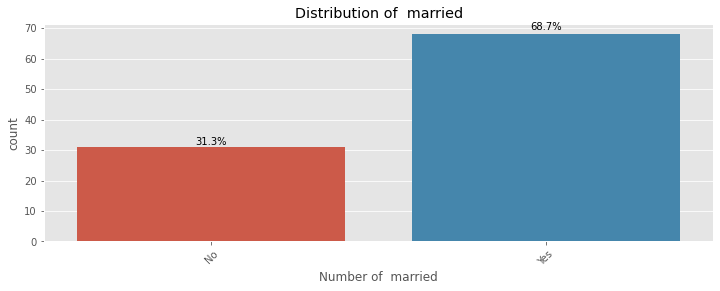

 20%|██        | 3/15 [00:00<00:01,  9.48it/s]

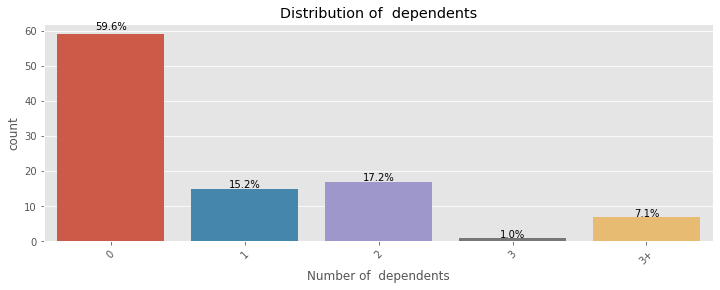

 27%|██▋       | 4/15 [00:00<00:01,  7.93it/s]

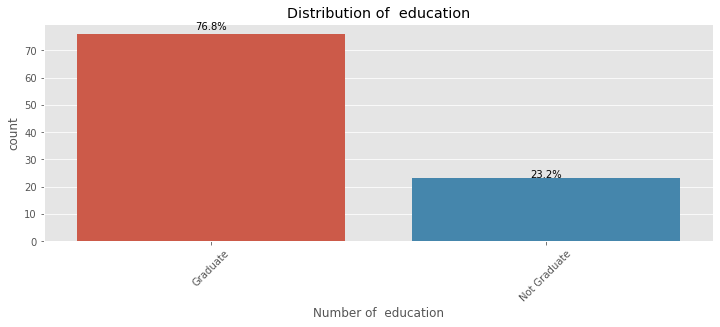

 33%|███▎      | 5/15 [00:00<00:01,  7.20it/s]

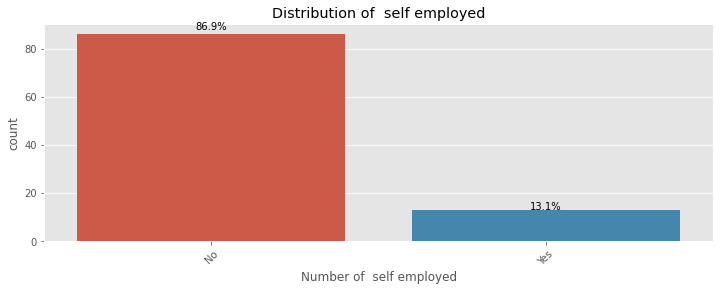

 40%|████      | 6/15 [00:00<00:01,  7.04it/s]

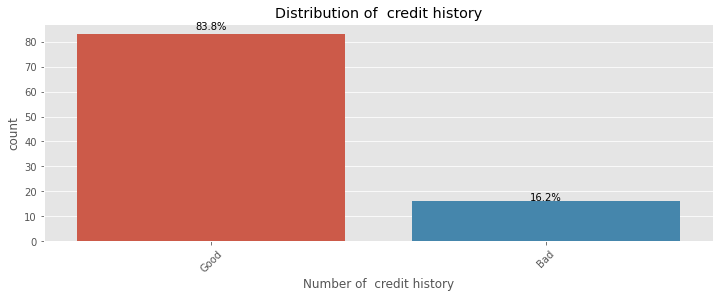

 87%|████████▋ | 13/15 [00:00<00:00,  9.35it/s]

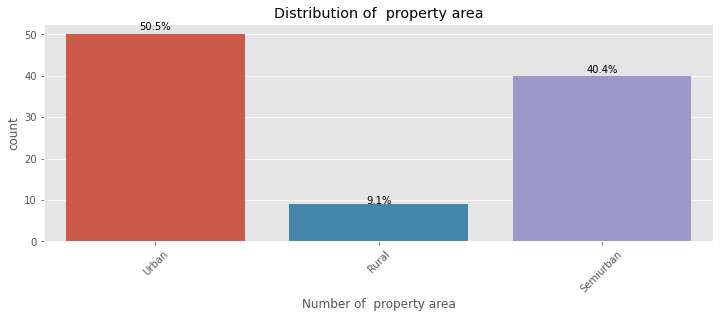

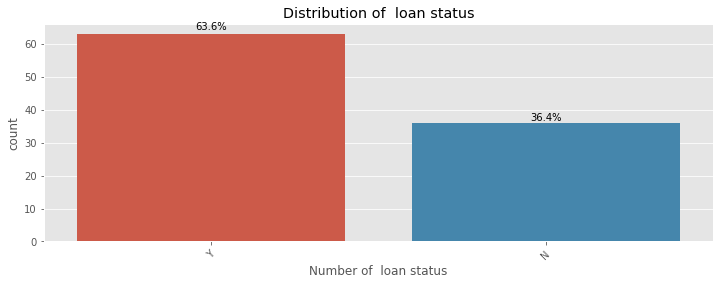

100%|██████████| 15/15 [00:01<00:00, 11.23it/s]


In [ ]:
#Helper Funciont
def plotter(df=CleanData,col_name='loan_status'):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,4))
    ax = sns.countplot(x=col_name, data=df)
    plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
    plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
    plt.xticks(rotation=45)
    total = len(CleanData[col_name])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x, y = p.get_xy() 
        ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


    plt.show()

df = CleanData.drop(columns=['referredby','member_id'])
for col in tqdm(list(df.columns)):
    if (df[col].dtype=='object'):
        plotter(col_name=col)

In [ ]:
#Helper Funcion
def plotter(df=CleanData,col_name='loan_status'):
    plt.style.use('ggplot')
    plt.figure(figsize=(12,4))
    ax = sns.scatterplot(x=col_name, data=df)
    plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
    plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
    plt.xticks(rotation=45)
    total = len(CleanData[col_name])
    plt.show()

df = CleanData.drop(columns=['referredby','member_id'])
for col in tqdm(list(df.columns)):
    if (df[col].dtype=='object'):
        plotter(col_name=col)

#### Objective One: To understand the relationship between the member's Income and the loan Purpose

In [35]:
import plotly.express as px
CleanData['credit_history'].value_counts()
fig = px.pie(CleanData,values=CleanData['credit_history'].value_counts(),names=['Good','Bad'])
fig

#### Understanding the the buying behavior of applicantincomes

In [ ]:
#This function selects only the categorical variable and prints them
#https://www.datacamp.com/community/tutorials/categorical-data
catVariables = LoanData.select_dtypes(include=['object'])
catVariables.head()

In [1]:
fig, ax = plt.subplots(figsize=(12, 5))
# ax.bar(LoanData['purpose'], LoanData['applicantincome'])
plt.xticks(rotation=45)

NameError: ignored

From the above plot, it's observable that most of members' income is spend on cars and least spend on domeappliances.

In [ ]:
#sns.countplot(x='Customer service calls', hue='Churn', data=df);
_, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
sns.countplot(x='gender', data=LoanData, ax=axes[0]);
sns.countplot(x='purpose', data=LoanData, ax=axes[1]);

From the above we can see that men are more applicants. And radios are bought more.

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(17,10))
# Add title
plt.title("Income Customer distribution")
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=LoanData['purpose'], y=LoanData['applicantincome'])
# Add label for vertical axis
plt.ylabel("Applicant income in $")

#### Understand the distribution of the members

In [ ]:
#fao.education.value_counts().plot(kind='bar', rot=45,color={'blue','green'})
LoanData.education.value_counts().plot(kind='pie', autopct='%1.1f%%')

From the above plot we can understand that 76.8% members are graduates while 23.2 are not graduates.

In [ ]:
#Dealing with categorical columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in catVariables:
    LoanData[feat] = le.fit_transform(LoanData[feat].astype(str))

print (LoanData.info())
'''

In [ ]:
### Multivariate

100%|██████████| 15/15 [00:00<00:00, 44.41it/s]


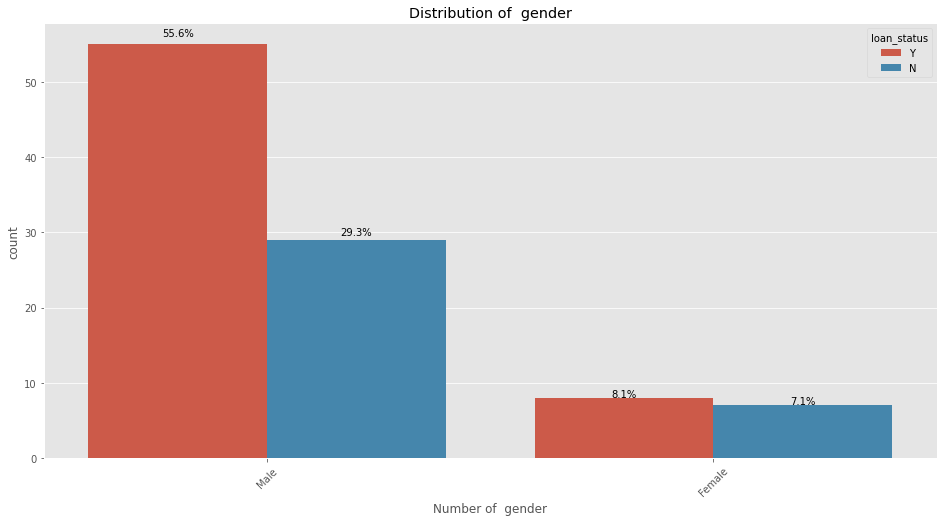

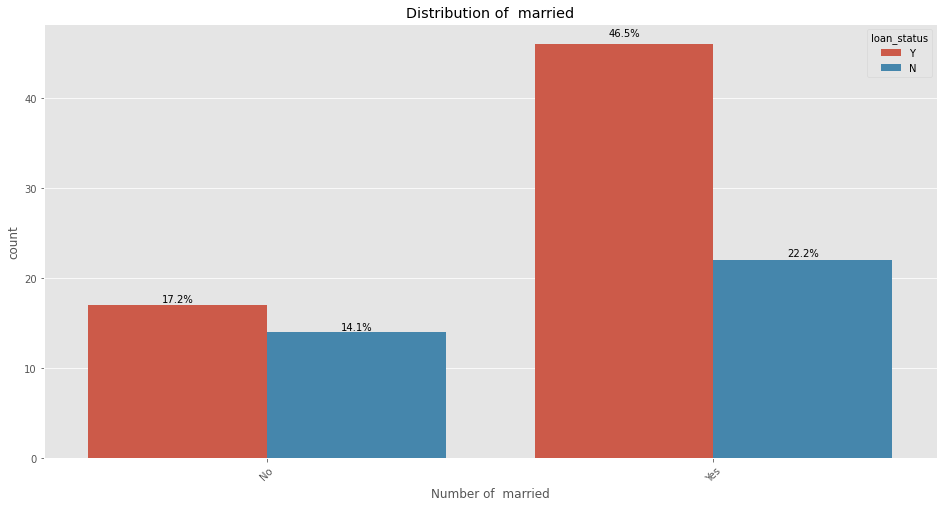

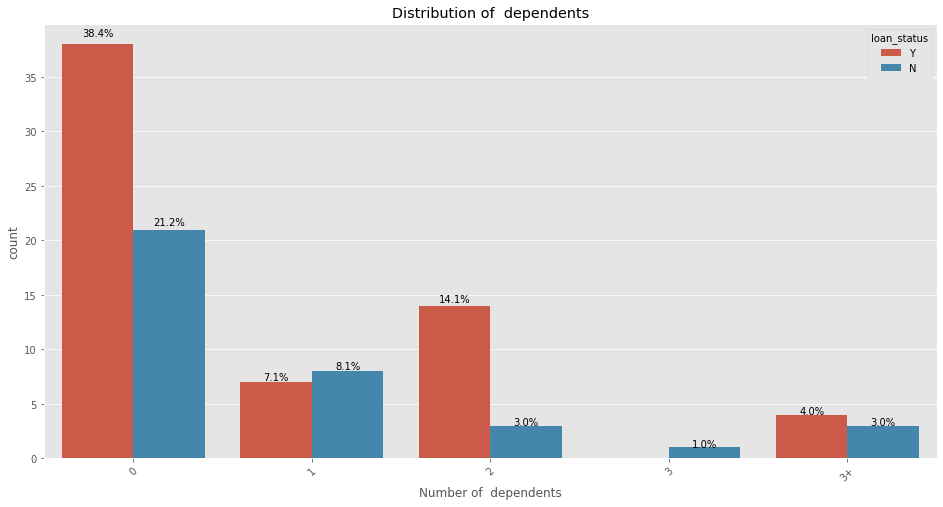

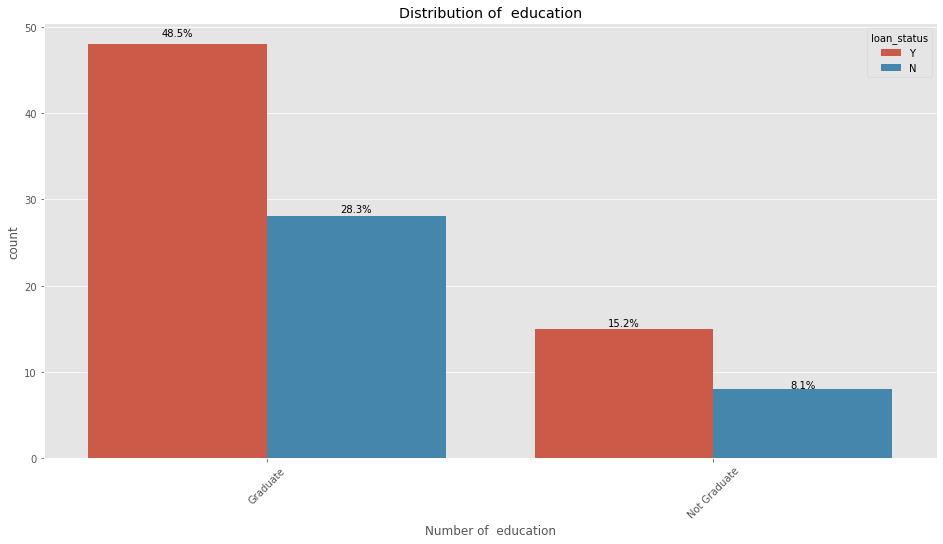

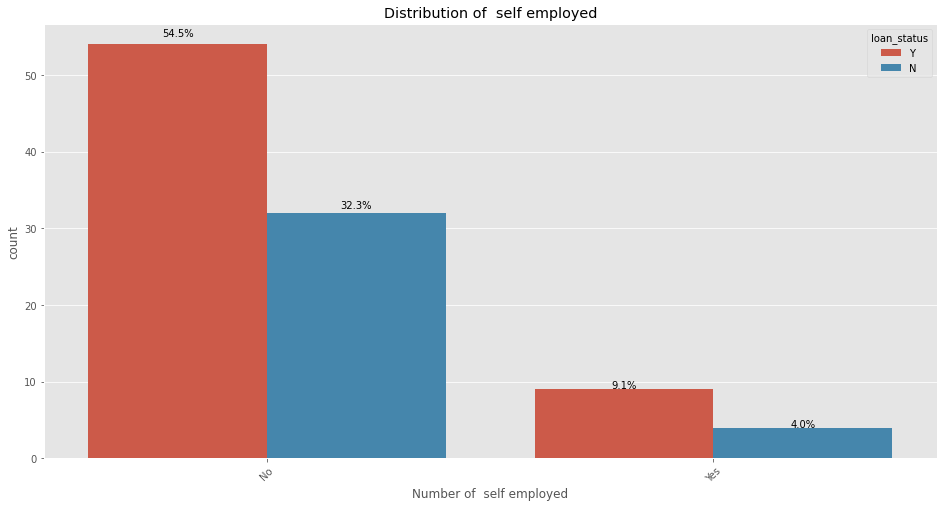

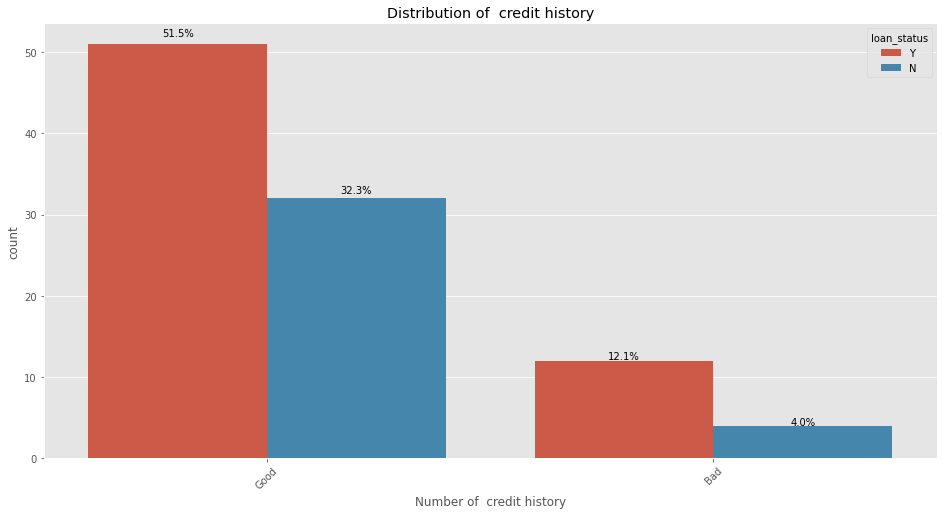

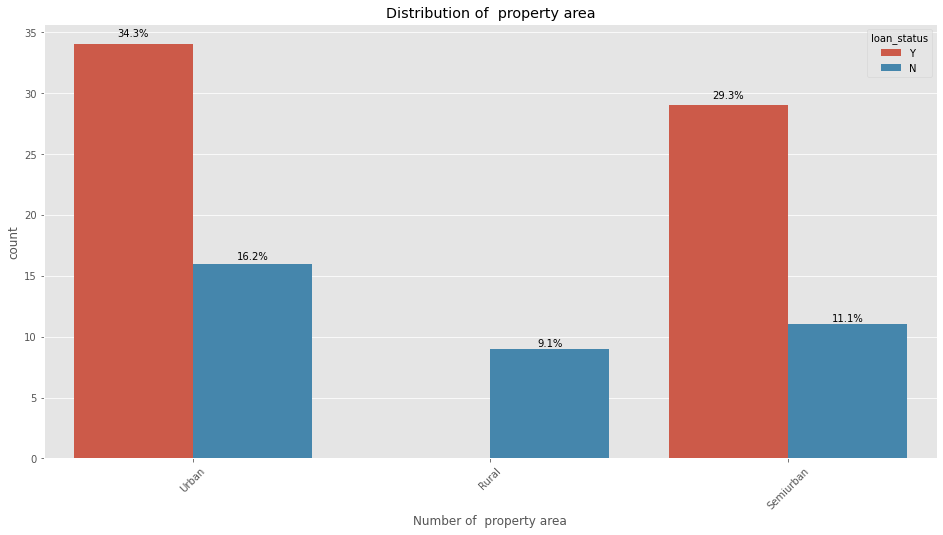

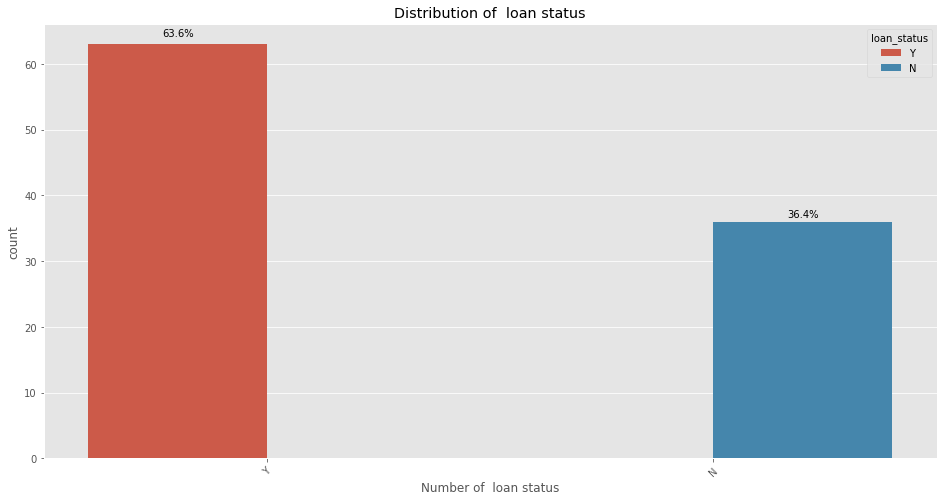

In [ ]:
def plotter_multivariate(df=CleanData,col_name='self_employed',hu = 'loan_status'):
  '''
  This function helps plot the counts basing on the bank account variable.

  var df: The specific dataframe used
  var col_name: The variable being used for plotting.
  return object: The sns figure itself. 

  >>> example
  >>> df = 
  '''
  plt.style.use('ggplot')
  plt.figure(figsize=(16,8))
  ax = sns.countplot(x= col_name, hue = hu, data= df)
  # ax = sns.countplot(x=col_name, data=df)
  plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
  plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
  plt.xticks(rotation=45)
  total = len(CleanData[col_name])
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      percentage = f'{100 * p.get_height()/total:.1f}%'
      x, y = p.get_xy() 
      ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')



plt.show()




df = CleanData.drop(columns=['referredby','member_id'])
for col in tqdm(list(df.columns)):
    if (df[col].dtype=='object'):
        plotter_multivariate(col_name=col)

#### IMPUTE TECHNIQUE

In [ ]:
#https://www.kaggle.com/pankeshpatel/handling-missing-data-imputation
#https://machinelearningmastery.com/handle-missing-data-python/

In [ ]:
#METHOD 2
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
# Since the median can only be computed on numerical attributes, we need to create a copu of the data without the text 
# attributes 
df_numerical = df[["Age", "Salary"]]
df_numerical
# Now you can fit the imputer instance to the training data using the fit() method
imputer.fit(df_numerical)

In [ ]:
# The imputer has simply computed the median of each attributes and stored the result in its statistics_ instance variable.
imputer.statistics_

In [ ]:
# Now you can use the trained imputer to transform the training set by replacing the missing values
X = imputer.transform(df_numerical)
# The result is a plain Numpy array containing the transformed features. 
X

In [ ]:
# If you want to put the Numpy array back into Pandas DataFrame
pd.DataFrame(X,columns=["Age", "Salary"])

In [ ]:
#Impute method for categorical variables
#https://www.kaggle.com/c/home-data-for-ml-course/discussion/133633
#https://heartbeat.fritz.ai/exploratory-data-analysis-data-characteristics-and-visualizations-fdf2606ce1ab
'''
class sklearn.impute.SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
strategy string, default=’mean’
'''

In [ ]:
'''
#Checking the mode.. of our columns
mode = LoanData.filter(["gender"]).mode()
#Now let's fillna our selected columns with thier respective mode values
col = ["gender"]
LoanData[cols]=LoanData[col].fillna(LoanData.mode().iloc[0])
'''

In [ ]:
#Let's see if we have duplicate rows in our dataset and deal with them
duplicate_rows = new_data[new_data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape)